# CS445: Computational Photography
## Programming Project 4: Image-Based Lighting


## Recovering HDR Radiance Maps 

Load libraries and data

In [ ]:
# jupyter extension that allows reloading functions from imports without clearing kernel :D
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [12]:
# System imports
from os import path
import math

# Third-Party Imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

datadir = 'images/'
utilfn = datadir + "utils"



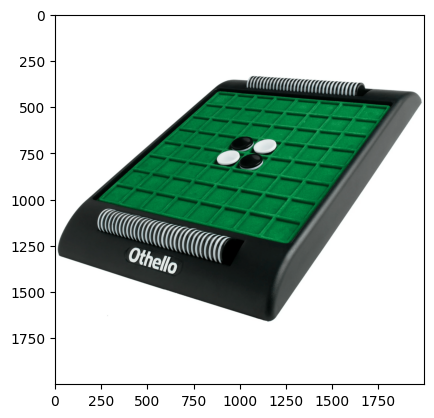

In [165]:
test_img = 'othello3.png'
img = np.float32(cv2.imread(datadir+test_img, cv2.IMREAD_COLOR_RGB) / 255.0)
plt.imshow(img)

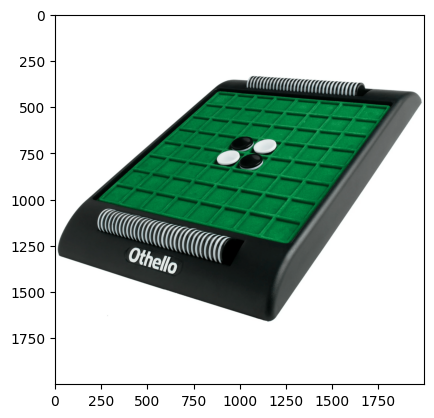

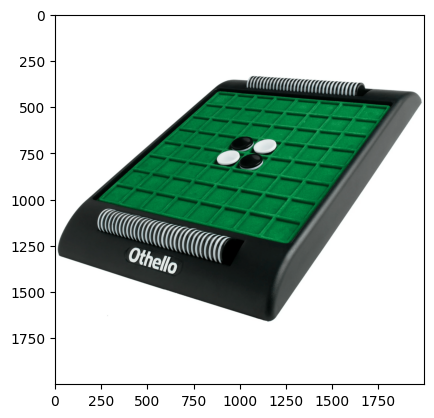

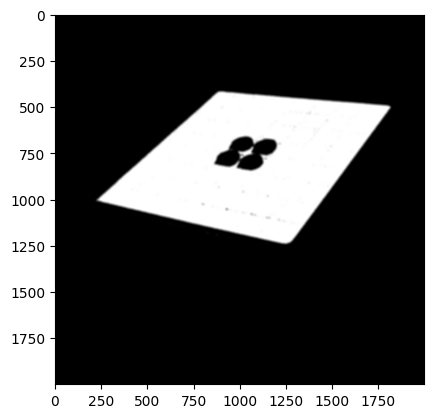

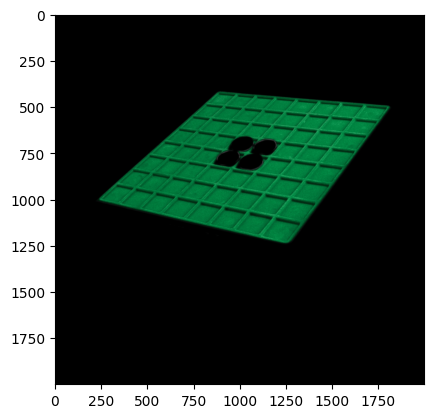

In [168]:
def prep_image(img, chroma_key,sigma,ksize, threshold):
    oned_fil = cv2.getGaussianKernel(ksize, sigma) # 1D kernel
    twod_fil = oned_fil*np.transpose(oned_fil)

    im_fil_low = img.copy()#cv2.filter2D(img,-1,twod_fil)
    
    for i in range (im_fil_low.shape[0]):
        for j in range(im_fil_low.shape[1]):
            color = img[i][j]
            difference = np.abs(chroma_key-color)
            im_fil_low[i][j] = np.ones(3) if (np.sum(difference) < threshold) else np.zeros(3)
    
    im_fil_low = np.clip(cv2.filter2D(im_fil_low,-1,twod_fil),0,1)
    plt.imshow(im_fil_low)
    plt.show()
    
    return im_fil_low
    

plt.imshow(img)
plt.show()

mask = prep_image(img,[0,1,0],30,15, 0.95)
masked_img = mask*img

plt.imshow(masked_img)
plt.show()

[1239, 1245]
[1817, 502]
[890, 417]
[221, 1008]


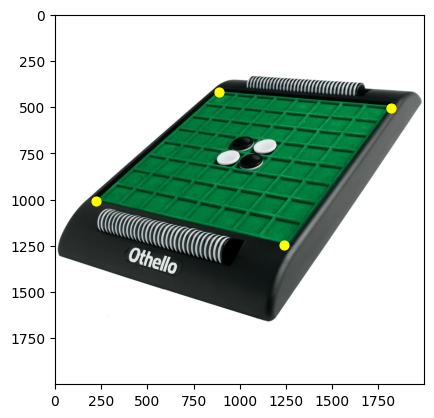

In [169]:
def find_corner_by_color(img):
    top = [-1,-1]
    bottom = [9999,9999]
    left = [9999,9999]
    right = [-1,-1]
    for i in range(img.shape[1]):
        for j in range(img.shape[0]):
            if img[j][i][2] > 0.015:
                if(j > top[1]):
                    top = [i,j]
                if(j < bottom[1]):
                    bottom = [i,j]
                if(i < left[0]):
                    left = [i,j]
                if(i > right[0]):
                    right = [i,j]
    
    return [top,right,bottom,left]

plt.imshow(img)
corners = find_corner_by_color(masked_img)
for corner in corners:
    plt.scatter(corner[0], corner[1], color='yellow', s=40, marker='o')
    print(corner)

plt.show()
